In [23]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import torch.nn as nn

import matplotlib.pyplot as plt

import time
import copy

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

In [11]:
print(mnist_trainset.data.size())

torch.Size([60000, 28, 28])


In [12]:
print(mnist_testset.data.size())

torch.Size([10000, 28, 28])


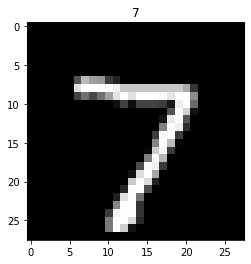

In [16]:
plt.imshow(mnist_testset.data[0], cmap='gray')
plt.title('%i' % mnist_testset.targets[0])
plt.show()

Single- and Multi-process Data Loading<br />
A DataLoader uses single-process data loading by default.

Within a Python process, the Global Interpreter Lock (GIL) prevents true fully parallelizing Python code across threads. To avoid blocking computation code with data loading, PyTorch provides an easy switch to perform multi-process data loading by simply setting the argument num_workers to a positive integer.

Single-process data loading (default)

In [22]:
data_loaders = {
    'train' : torch.utils.data.DataLoader(mnist_trainset, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(mnist_testset, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
data_loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f966586add0>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f96691e60d0>}

In [24]:
class MLP(nn.Module):
  def __init__(self, input_size=784, output_size=10):
    super(MLP, self).__init__()
    self.dense1 = nn.Linear(input_size, 120)
    self.dense2 = nn.Linear(120, 84)
    self.dense3 = nn.Linear(84, output_size)

  def forward(self, X):
    X = self.dense1(X)
    X = torch.relu(X)
    X = self.dense2(X)
    X = torch.relu(X)
    X = self.dense3(X)
    X = torch.relu(X)
    return X

In [26]:
model = MLP()
print(model)

MLP(
  (dense1): Linear(in_features=784, out_features=120, bias=True)
  (dense2): Linear(in_features=120, out_features=84, bias=True)
  (dense3): Linear(in_features=84, out_features=10, bias=True)
)


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [28]:
epochs = 10
train_losses = []
test_losses = [] 
train_correct = [] 
test_correct = [] 

In [ ]:
for inputs, labels in data_loaders["train"]:
  print(inputs.shape)

TypeError: ignored

In [ ]:
for epoch in range(epochs):
  since = time.time()
  print('-' * 10);
  print('Epoch {}/{}'.format(epoch, epochs - 1))
  print('-' * 10)

  for phase in ['train', 'val']:
    if phase == 'train':
        model.train()  # Set model to training mode
    else:
        model.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in data_loaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        # track history if only in train
        with torch.set_grad_enabled(phase == 'train'):
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase
            if phase == 'train':
                loss.backward()
                optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(data_loaders[phase].dataset)
    if phase == 'train':
        train_losses.append(epoch_loss)
    else:
        data_loaders.append(epoch_loss)

    print('{} Loss: {:.4f}'.format(
        phase, epoch_loss))

    # deep copy the model
    if phase == 'val' and epoch_loss < best_loss:
        best_loss = epoch_loss
        best_model_wts = copy.deepcopy(model.state_dict())

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
print('Best val Loss: {:4f}'.format(best_loss))
